<a href="https://colab.research.google.com/github/tashisharma10/KMeans-Customer-Segmentation/blob/main/Customer_segmenetation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Rights Reserved.

Copyright [2024] [tashisharma10]

Unauthorized copying, modification, distribution, or any other use of this code is strictly prohibited.

In [54]:
import pandas as pd

In [6]:
data=pd.read_csv("Mall_Customers.csv")

Top 5 rows

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 Last 5 rows

In [8]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Number of rows and columns

In [9]:
data.shape

(200, 5)

In [10]:
print("Number of rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of rows 200
Number of columns 5


 Info about data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Checking null values

In [12]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Statistics of data

In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


K means clustering

In [16]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
x=data[["Annual Income (k$)","Spending Score (1-100)"]]


In [18]:
print(x)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [19]:
from sklearn.cluster import KMeans

In [21]:
k_means=KMeans(n_clusters=5,n_init='auto')
k_means.fit(x)

KMeans(n_clusters=5, n_init='auto')

In [20]:
k_means=KMeans(n_clusters=5,n_init='auto')
k_means.fit_predict(x)

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

Elbow method to find optimum number of clusters

In [22]:
wcss=[]
for i in range(1,11):
  k_means=KMeans(n_clusters=i,n_init='auto')
  k_means.fit(x)
  wcss.append(k_means.inertia_)

In [23]:
print(wcss) # within cluster sum of squares

[269981.28000000014, 186195.07171089793, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37442.24745037571, 31573.96066412273, 25388.76002817936, 23758.265863027125, 21911.633723333718]


In [24]:
import matplotlib.pyplot as plt


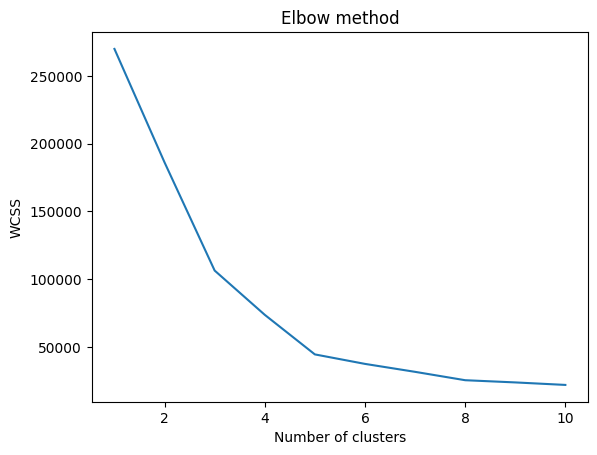

In [25]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

 Model Training

In [ ]:
x=data[["Annual Income (k$)","Spending Score (1-100)"]]

In [26]:
k_means=KMeans(n_clusters=5,random_state=42,n_init='auto')
y_means=k_means.fit_predict(x)

In [27]:
print(y_means)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


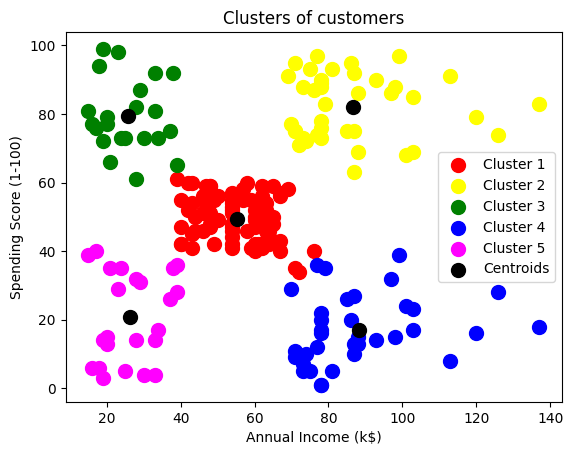

In [41]:
plt.scatter(x.iloc[y_means==0,0],x.iloc[y_means==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x.iloc[y_means==1,0],x.iloc[y_means==1,1],s=100,c='yellow',label='Cluster 2')
plt.scatter(x.iloc[y_means==2,0],x.iloc[y_means==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x.iloc[y_means==3,0],x.iloc[y_means==3,1],s=100,c='blue',label='Cluster 4')
plt.scatter(x.iloc[y_means==4,0],x.iloc[y_means==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [34]:
import joblib

In [35]:
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

In [36]:
model=joblib.load("customer_segmentation")

In [53]:
from tkinter import Tk, Label, Entry, Button
from IPython.display import display, clear_output
import ipywidgets as widgets

In [52]:


def show_entry_fields(button):
    clear_output()
    p1 = int(e1.value)
    p2 = int(e2.value)

    model = joblib.load("customer_segmentation")

    # Create a DataFrame with the same feature names as used during training
    input_data = pd.DataFrame([[p1, p2]], columns=["Annual Income (k$)", "Spending Score (1-100)"])

    result = model.predict(input_data)
    print("This customer belongs to cluster no ", result[0])

    if result[0] == 0:
        display(widgets.Label(value="Customers with medium annual income and medium annual spending"))
    elif result[0] == 1:
        display(widgets.Label(value="Customers with high annual income and high annual spending"))
    elif result[0] == 2:
        display(widgets.Label(value="Customers with low annual income and high annual spending"))
    elif result[0] == 3:
        display(widgets.Label(value="Customers with high annual income and low annual spending"))
    elif result[0] == 4:
        display(widgets.Label(value="Customers with low annual income and low annual spending"))

# Creating input fields and button
e1 = widgets.IntText(description="Annual Income(k$)")
e2 = widgets.IntText(description="Spending Score(1-100)")
button = widgets.Button(description="Predict")

display(e1, e2, button)

button.on_click(show_entry_fields)


IntText(value=0, description='Annual Income(k$)')

IntText(value=0, description='Spending Score(1-100)')

Button(description='Predict', style=ButtonStyle())